In [1]:
# Necassary imports
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat # to be able to use .mat file in the python environment

In [2]:
# QUESTION 2
print('QUESTION 2\n')

data = loadmat('XData.mat')
x_data = data['x'].flatten()
print('The dataset: ', x_data, '\n')

QUESTION 2

The dataset:  [ 89.9  95.3 101.4  97.1 103.  104.   90.7  98.2  78.7 111.5  93.7  88.
  97.5  85.7  99.8  94.4 121.8 111.4  75.  104.4  86.   97.4 101.6 107.5
  97.3 115.8  95.2 103.3 106.6 100.9] 



In [3]:
# PART A
print('PART A\n')

mean = np.mean(x_data)
median = np.median(x_data)
print('Sample mean: %f \nSample median: %f\n' % (mean, median))

PART A

Sample mean: 98.436667 
Sample median: 97.850000



In [4]:
# PART B
print('PART B\n')

std = np.std(x_data)
q25, q75 = np.percentile(x_data, [25, 75])
iqr = q75 - q25
print('Sample standard deviation: %f \nSample inter-quartile range: %f\n' %
      (std, iqr))

PART B

Sample standard deviation: 10.056523 
Sample inter-quartile range: 9.950000



PART C

The histograms:


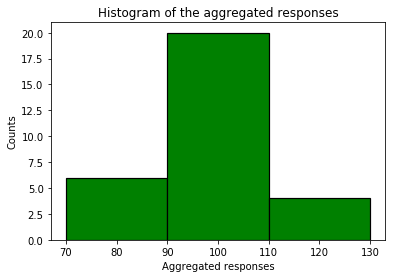

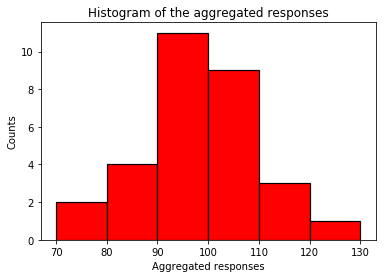

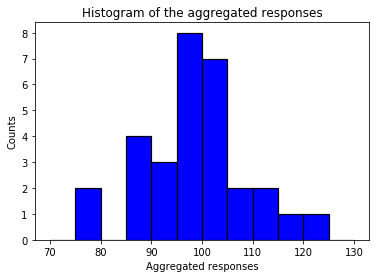

In [5]:
figure_num = 1 # to keep track of a figure's number 

# PART C
print('PART C\n')

x_range = [70, 130]
num_bins = [3, 6, 12]
colors = ['g', 'r', 'b']

print('The histograms:')
for i in range(3):
    plt.figure(figure_num)
    figure_num += 1
    plt.title('Histogram of the aggregated responses')
    plt.ylabel('Counts')
    plt.xlabel('Aggregated responses')
    plt.hist(x_data.flatten(), bins=num_bins[i], range=x_range, 
                      color=colors[i], edgecolor='black', linewidth=1.2)
    plt.show(block=False)

PART D

The Normal Quantile Plot of the dataset:


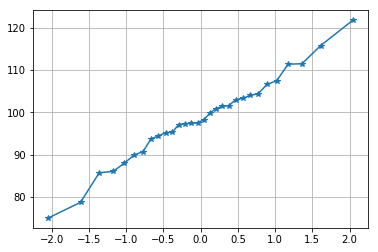

In a Normal Quantile Plot, a roughly straight line is formed when both sets of quantiles came from the same Normal Distribution. Thus, samples of X are normally distributed.



In [6]:
# PART D
print('PART D\n')

plt.figure(figure_num)
figure_num += 1

# Python equivalent of the Matlab Normal Quantile Plot code given in the assignment
y = np.sort(x_data)
n = np.size(x_data)
f = (np.arange(1, n + 1) - 3/ 8) / (n + 1 / 4)
q = 4.91 * (f ** 0.14 - (1 - f) ** 0.14)
plt.grid()
plt.plot(q, y, '*-')

print('The Normal Quantile Plot of the dataset:')
plt.show(block=False)
print('In a Normal Quantile Plot, a roughly straight line is formed ' + 
      'when both sets of quantiles came from the same Normal ' + 
      'Distribution. Thus, samples of X are normally distributed.\n')

PART E

The sample mean computed from 1000 bootstrap samples: 98.459513
The bootstrapped estimate for the standard error of the mean: 1.795758906992932
The 95% confidence interval of the mean: (95.00716666666669, 101.86925000000002)
Overall, mean of the dataset can be reported as: 98.460 +- 1.796, (95.007, 101.869)



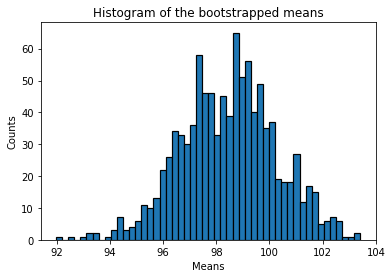

In [7]:
# PART E
print('PART E\n')

# Function to perform bootstrap resampling
def bootstrap_resampling(data, bootstraps, stat_func):
    """
    Given the data, number of bootstrapping iterations and the statistic of 
    interest; this function returns a list of statistics obtained from each 
    bootstrapped sample of the original data.
    Args:
        data: The original data
        bootstraps: The number of bootstrapping iterations
        stat_func: The function to compute the statistic of interest 
            (e.g.: np.mean, np.std, etc.)
    Returns: 
        bootstrap_replicate: The mean of all bootstrap replicates
        standard_error: The standard error of the bootstrap replicate
        bootstrap_replicates: The list of statistics obtained from the 
            bootstrapped samples
    """
    bootstrap_replicates = []
    sample_size = np.size(data)
    for _ in range(bootstraps):
        bootstrap_sample = np.random.choice(data, sample_size, replace=True)
        bootstrap_replicates.append(stat_func(bootstrap_sample))
    return np.mean(bootstrap_replicates), np.std(bootstrap_replicates), bootstrap_replicates

# Function to compute the confidence interval of data samples
def compute_confidence_interval(data, confidence):
    """
    Given the data and the confidence level, computes the confidence interval
    of the data samples.
    Args:
        data: The given data
        confidence: The confidence level, known as alpha (between 0 and 100)
    Returns:
        lower: The lowerbound of the confidence interval
        upper: The upperbound of the confidence interval
    """
    sorted_data = np.sort(data)
    zlower = np.percentile(sorted_data, (100 - confidence) / 2)
    upper = np.percentile(sorted_data, confidence + (100 - confidence) / 2)
    return lower, upper

# Performing the bootstrap sampling and computing the bootstrap replicate 
# of the mean together with its standard error
bootstrap_mean, standard_error_mean, bootstrap_means = bootstrap_resampling(x_data, 
                                                                            1000, np.mean)
print('The sample mean computed from %s bootstrap samples: %f' % 
      (1000, bootstrap_mean))
print('The bootstrapped estimate for the standard error of the mean:',
      standard_error_mean)

# Computing the 95% confidence interval 
lower, upper = compute_confidence_interval(bootstrap_means, 95)
confidence_interval = (lower, upper)
print('The 95% confidence interval of the mean:', confidence_interval)

print('Overall, mean of the dataset can be reported as: %.3f +- %.3f, (%.3f, %.3f)\n' % 
     (bootstrap_mean, standard_error_mean, lower, upper))

# Plotting an histogram for the bootstrap distribution
plt.figure(figure_num)
figure_num += 1
plt.title('Histogram of the bootstrapped means')
plt.ylabel('Counts')
plt.xlabel('Means')
plt.hist(bootstrap_means, bins=50, edgecolor='black', linewidth=1.2)
plt.show(block=False)

PART F

The sample standard deviation computed from 1000 bootstrap samples: 9.784514
The bootstrapped estimate for the standard error of the standard deviation: 1.3473405893908654
The 95% confidence interval of the standard deviation: (7.08475822765843, 12.411910114442144)
Overall, standard deviation of the dataset can be reported as: 9.785 +- 1.347, (7.085, 12.412)



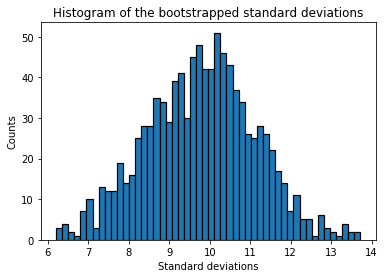

In [8]:
# PART F
print('PART F\n')

# Performing the bootstrap sampling and computing the bootstrap replicate of the
# standard deviation together with its standard error
bootstrap_std, standard_error_std, bootstrap_stds = bootstrap_resampling(x_data, 
                                                                         1000, np.std)
print('The sample standard deviation computed from %s bootstrap samples: %f' % 
      (1000, bootstrap_std))
print('The bootstrapped estimate for the standard error of the standard deviation:',
      standard_error_std)

# Computing the 95% confidence interval 
lower, upper = compute_confidence_interval(bootstrap_stds, 95)
confidence_interval = (lower, upper)
print('The 95% confidence interval of the standard deviation:', confidence_interval)

print('Overall, standard deviation of the dataset can be reported as: %.3f +- %.3f, (%.3f, %.3f)\n'
      % (bootstrap_std, standard_error_std, lower, upper))

# Plotting an histogram for the bootstrap distribution
plt.figure(figure_num)
figure_num += 1
plt.title('Histogram of the bootstrapped standard deviations')
plt.ylabel('Counts')
plt.xlabel('Standard deviations')
plt.hist(bootstrap_stds, bins=50, edgecolor='black', linewidth=1.2)
plt.show(block=False)

PART G

The sample mean computed from jackknife samples: 98.43666666666667
The jackknifed estimate for the standard error of the mean: 0.3467766563828598
The 95% confidence interval of the mean: (97.78103448275863, 99.15232758620692)
Overall, mean of the dataset can be reported as: 98.437 +- 0.347, (97.781, 99.152)



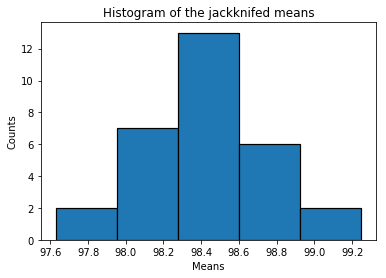

The sample standard deviation computed from jackknife samples: 10.046791101023341
The jackknifed estimate for the standard error of the standard deviation: 0.27457253785040076
The 95% confidence interval of the standard deviation: (9.225836041965325, 10.22730576358885)
Overall, standard deviation of the dataset can be reported as: 10.047 +- 0.275, (9.226, 10.227)



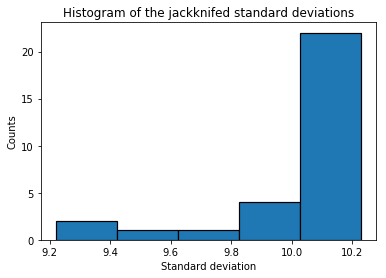

In [9]:
# PART G
print('PART G\n')

# Function to perform Jacknife resampling
def jackknife_resampling(data, stat_func):
    """
    Given the data and the statistic of interest; this function returns a
    list of statistics obtained from each jacknifed sample of the original data.
    Args:
        data: The original data
        stat_func: The function to compute the statistic of interest 
            (e.g.: np.mean, np.std, etc.)
    Returns: 
        jackknife_replicate: The mean of all jackknife replicates
        standard_error: The standard error of the jackknife replicate
        jackknife_replicates: The list of statistics obtained from the 
            jackknifed samples
    """
    jackknife_replicates = []
    jackknifes = np.size(data)
    for i in range(jackknifes):
        jackknife_data = [elem for j, elem in enumerate(data) if i != j]
        jackknife_replicate_i = stat_func(jackknife_data)
        jackknife_replicates.append(jackknife_replicate_i)
    return np.mean(jackknife_replicates), np.std(jackknife_replicates), jackknife_replicates

# Performing the jackknife sampling and computing the jackknife replicate 
# of the mean togerther with its standard error
jackknife_mean, standard_error_mean, jackknife_means = jackknife_resampling(x_data, np.mean)
print('The sample mean computed from jackknife samples:', jackknife_mean)
print('The jackknifed estimate for the standard error of the mean:',
      standard_error_mean)

# Computing the 95% confidence interval 
lower, upper = compute_confidence_interval(jackknife_means, 95)
confidence_interval = (lower, upper)
print('The 95% confidence interval of the mean:', confidence_interval)

print('Overall, mean of the dataset can be reported as: %.3f +- %.3f, (%.3f, %.3f)\n' % 
     (jackknife_mean, standard_error_mean, lower, upper))

# Plotting an histogram for the jackknife distribution
plt.figure(figure_num)
figure_num += 1
plt.title('Histogram of the jackknifed means')
plt.ylabel('Counts')
plt.xlabel('Means')
plt.hist(jackknife_means, bins=5, edgecolor='black', linewidth=1.2)
plt.show(block=False)

# Performing the jackknife sampling and computing the jackknife replicate 
# of the standard deviation togerther with its standard error
jackknife_std, standard_error_std, jackknife_stds = jackknife_resampling(x_data, np.std)
print('The sample standard deviation computed from jackknife samples:', jackknife_std)
print('The jackknifed estimate for the standard error of the standard deviation:',
      standard_error_std)

# Computing the 95% confidence interval 
lower, upper = compute_confidence_interval(jackknife_stds, 95)
confidence_interval = (lower, upper)
print('The 95% confidence interval of the standard deviation:', confidence_interval)

print('Overall, standard deviation of the dataset can be reported as: %.3f +- %.3f, (%.3f, %.3f)\n' % 
     (jackknife_std, standard_error_std, lower, upper))

# Plotting an histogram for the jackknife distribution
plt.figure(figure_num)
figure_num += 1
plt.title('Histogram of the jackknifed standard deviations')
plt.ylabel('Counts')
plt.xlabel('Standard deviation')
plt.hist(jackknife_stds, bins=5, edgecolor='black', linewidth=1.2)
plt.show(block=False)

# Show all figures
plt.show()